Olá, Reinner!

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

# Importar as bibliotecas necessárias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split




# Ler os dados

In [2]:
#ler os dados
df = pd.read_csv("/datasets/users_behavior_upd.csv")

In [3]:
print(df.head())

   calls  minutes  messages   mb_used  is_ultimate
0   40.0   311.90      83.0  19915.42            0
1   85.0   516.75      56.0  22696.96            0
2   77.0   467.66      86.0  21060.45            0
3  106.0   745.53      81.0   8437.39            1
4   66.0   418.74       1.0  14502.75            0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calls        3214 non-null   float64
 1   minutes      3214 non-null   float64
 2   messages     3214 non-null   float64
 3   mb_used      3214 non-null   float64
 4   is_ultimate  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Há outliers?
- A coluna is_ultimate está balanceada? Senão, como contornar o desbalanceamento?
</div>

# Criar Features e Target

Vamos dividir os dados em features e target. Os dados que queremos classificar estão na coluna `is_ultimate`, logo a mesma não podera entrar no df `features` e será o df `target`

In [5]:
#removendo a coluna is_ultimate
features = df.drop(['is_ultimate'], axis=1)


In [6]:
target = df['is_ultimate']

# Dividir os conjuntos de `treino`, `validação` e `teste`

## Vamos seguir a premissa de 3:1:1. Ou seja: `60% para treinamento`, `20% para validação` e `20% para teste`.

### Divisão 60% para treinamento e 40% para o restante

In [7]:
features_train, features_rest, target_train, target_rest = train_test_split(features, target, test_size=0.4, random_state=12345)

In [8]:
print("O tamanho do dataframe original é",features.shape[0])
print("O tamanho do dataframe de treino", features_train.shape[0])
print("O tamanho do restante do dataframe é", features_rest.shape[0])

O tamanho do dataframe original é 3214
O tamanho do dataframe de treino 1928
O tamanho do restante do dataframe é 1286


### Divisão dos 20% para validação e 20% teste. Utilizaremos como base o `features_rest` e `target_rest`

In [9]:
features_valid, features_test, target_valid, target_test = train_test_split(features_rest, target_rest, test_size=0.5, random_state=12345)

In [10]:
print("O tamanho do dataframe original é:",features.shape[0])
print("O tamanho do dataframe de validação é:",features_valid.shape[0])
print("O tamanho do dataframe de teste é:",features_test.shape[0])

O tamanho do dataframe original é: 3214
O tamanho do dataframe de validação é: 643
O tamanho do dataframe de teste é: 643


# Testar os modelos

Este é um problema de classificação. para isso vamos testar 3 modelos diferentes e escolher o melhor com base na acurácia.

## Árvore de decisão

In [11]:
#Vamos criar um loop for para testar com diversas profundidades e escolher a melhor profundidade com base na acurácia
d1 = [] #variável para salvar as profundidade
result1_acc = [] # variável para salvar as acurácias
best_result1 = 0
best_model1 =  None
best_depth1 = 0

#Treinando o modelo e validando no dataframe de validação
for depth in range (1,10):
    d1.append(depth)
    model_1 = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_1.fit(features_train, target_train)
    result_1 = model_1.score(features_valid, target_valid)
    result1_acc.append(result_1)
    if result_1 > best_result1:
        best_result1 = result_1
        best_model1 = model_1
        best_depth1 = depth
print(f"A acurácia do melhor modelo é:{best_result1} e a profundidade máxima é:{best_depth1}")    
    

A acurácia do melhor modelo é:0.7853810264385692 e a profundidade máxima é:3


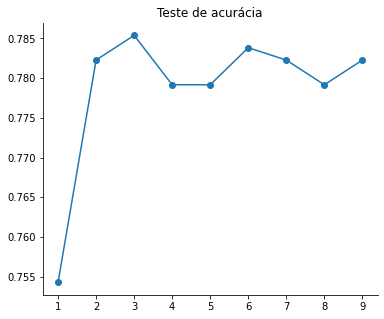

In [12]:
fig = plt.figure(figsize=(6,5))
plt.plot(d1,result1_acc,"o-")
plt.title("Teste de acurácia")
sns.despine()

Com o auxílio do gráfico podemos ver que após a `profundidade 3` a acurácia é menor, ou seja, não é necessário gastar poder computacional, elevar os custos do projeto e nem o tempo.

In [13]:
#Testando o modelo, com a melhor acurácia, no dataframe de teste
model1 = DecisionTreeClassifier(max_depth=3, random_state=12345)
model1.fit(features_train, target_train)
result1 = model1.score(features_test, target_test) 
print(f"A acurácia aplicada para o dataframe de teste é:{result_1}")

A acurácia aplicada para o dataframe de teste é:0.7822706065318819


## Floresta Aleatória

Para floresta aleatória precisamos variar tanto a quantidade de florestas (`n_estimators`) quanto a profundidade(`max_depth`) de cada floresta. Para isso faremos 2 loops `for`.

In [14]:
#Iniciar variáveis e testar no dataframe de validação
result2_acc = []
best_result2 = 0
best_model2 = None
best_depth2 = 0
best_est = 0

for est in range (10,51,10):
    for depth in range (1,10):
        model2 = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        model2.fit(features_train, target_train)
        result2 = model2.score(features_valid, target_valid)
        result2_acc.append(result2)
        if result2 > best_result2:
            best_result2 = result2
            best_model2 = model2
            best_depth2 = depth
            best_est = est
print(f"O modelo com a melhor acurácia tem:{best_result2}, n_estimators:{best_est} e profundidade máxima:{best_depth2}")
            
            


O modelo com a melhor acurácia tem:0.8087091757387247, n_estimators:40 e profundidade máxima:8


In [15]:
#Testar no datafram de teste
model2 = RandomForestClassifier(n_estimators=40, max_depth=8, random_state=12345)
model2.fit(features_train, target_train)
result2 = model2.score(features_test, target_test)
print(f"A acurácia no dataframe de teste é:{result2}")

A acurácia no dataframe de teste é:0.7962674961119751


## Regressão Logística

In [16]:
model3 = LogisticRegression(random_state=12345, solver='liblinear')
model3.fit(features_train, target_train)
result_valid = model3.score(features_valid, target_valid)
print(f"A acurácia é:{result_valid}")


A acurácia é:0.7573872472783826


Para o modelo de Regressão logística não temos ajuste de hiperparâmetros, logo não é feito um treino na validação e encontrado o melhor ajuste para depois testar o modelo no dataframe de teste

# A escolha do melhor modelo

In [17]:
#Criar um dicionário
best_result = {
    'Árvore de Decisão': result1,
    'Floresta Aleatória':result2,
    'Regressão Logística':result_valid
} 

#Acessar a chave do maior resultado
key = max(best_result, key=best_result.get)

#Acessar o maior resultado
value = best_result[key]

print(f"O modelo com maior acurácia é:{key} que teve {value} de acurácia")

O modelo com maior acurácia é:Floresta Aleatória que teve 0.7962674961119751 de acurácia



<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. No geral, você respondeu corretamente as questões.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente
- Calibração de hiperparâmetros
- Ajustou 3 modelos

Como sugestaõ:
- É importante realizar EDA
- A conclusão está breve. É importante desenvolver habilidade para reportar resultados.


Conte conosco. Lembre-se de que você pode tirar dúvidas comigo usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.

</div>